<a href="https://colab.research.google.com/github/alenabd24/CIFAR-10_Image_Classification/blob/main/ImageClassifierCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification CNN - Alen Abdrakhamnov**

<div style="font-size: 50px;">


| Concept               | What It Is                                                                                      | Where It Fits in This Architecture                                                           |
|-----------------------|-------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------|
| Filter / Kernel       | A small matrix (e.g. 3×3) used in convolution to detect patterns like edges, textures, etc.       | Each convolutional layer 𝐶𝑙 has its own filter set.                                           |
| Feature Map           | The result of applying filters across the input image. Shows where specific features activate.   | 𝐶𝑙(𝑥) is the feature map for filter set 𝑙.                                                    |
| Convolutional Layer   | A layer that applies filters to extract spatial features.                                       | Each 𝐶𝑙 is a convolutional layer, operating independently on 𝑥.                                |
| ReLU                  | An activation function: sets negative values to 0. Adds non-linearity.                           | Typically applied after each 𝐶𝑙(𝑥) to help learn complex patterns.                              |
| Max Pooling           | A downsampling operation that keeps only the strongest activations (e.g., from a 2x2 patch).       | Not specified in Section 2.1, but could be added between blocks to reduce spatial size.         |
| Fully Connected Layer | A traditional neural layer where every input connects to every output.                           | Used to compute the weight vector 𝑎 and later in the output block.                              |

</div>


Saving Intermediate_Blocks.png to Intermediate_Blocks.png


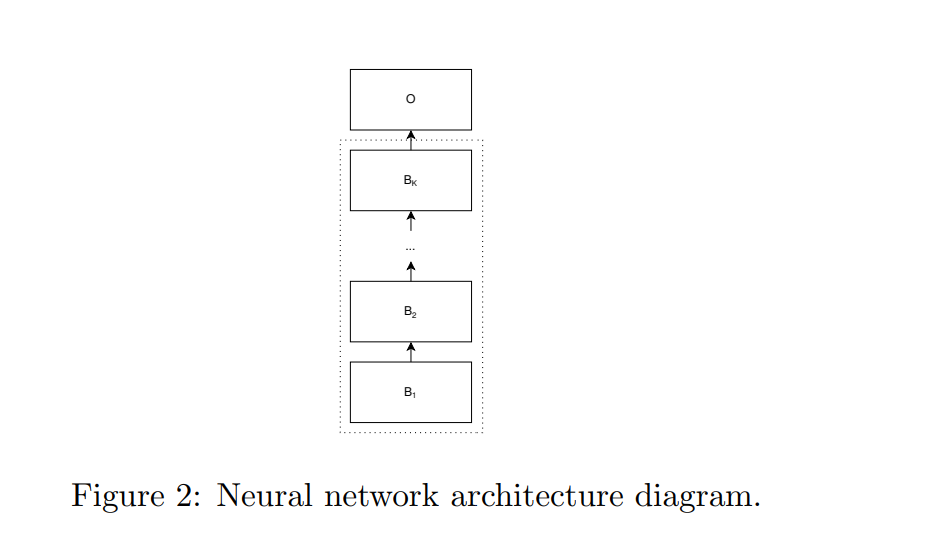

In [2]:
from google.colab import files
uploaded = files.upload()

# Once uploaded, use the filename from the 'uploaded' dictionary:
from IPython.display import Image, display
display(Image(filename='Intermediate_Blocks.png'))


1. Input image goes through multiple convolutional paths in each block

2. Each block decides how to combine those paths based on what it sees in the image

3. The output of all blocks is compressed to a 1D feature summary

4. Fully connected layers map those features to a class score

5. Training adjusts all filters, weights, and FC layers to improve classification



###1. The first task is to create a DataLoader for the training & testing datasets, which should generate batches of examples

In [3]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


transform ensures the PyTorch tensor is of correct shape (Channel, Height, Width), and scales values [-1,1]

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


Loading the CIFAR-10 datasets:


In [5]:
# Training dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Test dataset
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


100%|██████████| 170M/170M [00:03<00:00, 42.9MB/s]


Fetching a batch of data from the training loader and printing the shape:

In [9]:
for images, labels in train_loader:
    print(images.shape)  # (batch_size, 3, 32, 32)
    print(labels.shape)  # (batch_size,)
    break


torch.Size([128, 3, 32, 32])
torch.Size([128])


The above was also done for test loader, to ensure the tensor shapes are equivalent

Creating DataLoaders:

In [6]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=2)


| Tensor | Shape           | Meaning                                                                          |
|--------|-----------------|----------------------------------------------------------------------------------|
| images | [128, 3, 32, 32] | 128 images, each with 3 channels (RGB), 32×32 pixels                              |
| labels | [128]           | 128 integer labels (one for each image), values from 0–9 (CIFAR-10 classes)        |


Original effort below:

In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Step 1: Define transforms (normalization + conversion to tensor)
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts image to tensor in [0, 1]
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize RGB channels
])

# Step 2: Load CIFAR-10 training and test datasets
train_dataset = datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform
)

test_dataset = datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform
)

# Step 3: Create DataLoaders
train_loader = DataLoader(
    train_dataset, batch_size=64, shuffle=True, num_workers=2
)

test_loader = DataLoader(
    test_dataset, batch_size=64, shuffle=False, num_workers=2
)


100%|██████████| 170M/170M [00:13<00:00, 13.1MB/s]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


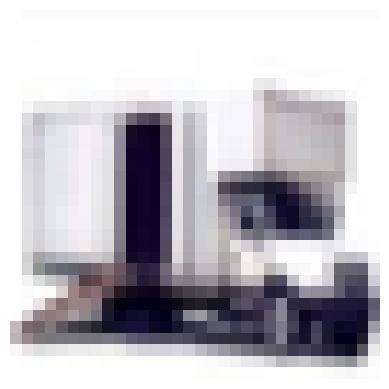

Label: truck


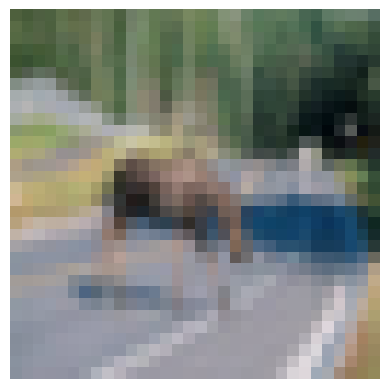

Label: deer


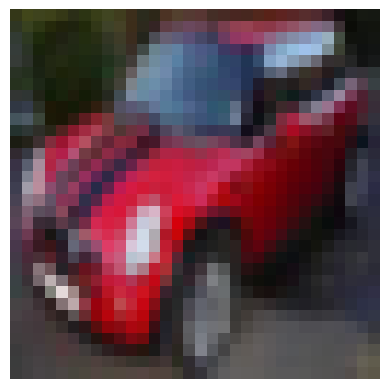

Label: automobile


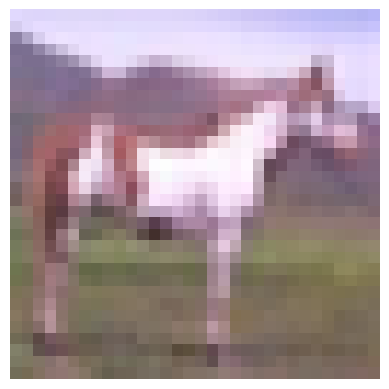

Label: horse


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 class labels
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

# Get one batch of images and labels
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Function to unnormalize and show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize (since we normalized to [-1, 1])
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # CHW → HWC
    plt.axis('off')
    plt.show()

# Show the first 4 images with labels
for i in range(4):
    imshow(images[i])
    print(f"Label: {classes[labels[i]]}")
